In [1]:
import geopandas as gpd

In [66]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
directory = os.walk('BDO_250')
list_of_shape_files = []

In [55]:
for dir_, _, files in os.walk('BDO_250'):
    for index, file in enumerate(files):
        if file[-3:] == 'shp':
            list_of_shape_files.append([dir_, file])
        

In [56]:
dictionary_of_geodataframes = {}

In [57]:
dictionary_of_geodataframes = {}
for dir_, shape in list_of_shape_files:
    path = os.path.join(dir_, shape)
    geodataframe = gpd.read_file(path, encoding='cp1250')
    dictionary_of_geodataframes[shape[:-4]] = geodataframe

In [58]:
for key in dictionary_of_geodataframes:
    print(key)

arkusze
chron_krajob
cieki
cz_gmin2003
drogi
gminy2003
granice_2003
hydro_pkt
hydro_pow
jeziora
koleje
lotniska
miejsc
ochr_pkt
ochr_pow
parki_kr
parki_nar
pokrycie
powiaty2003
przem_lin
przem_pkt
rezerwaty
siatka_karto
stacje_kol
zab_pkt
zab_pow


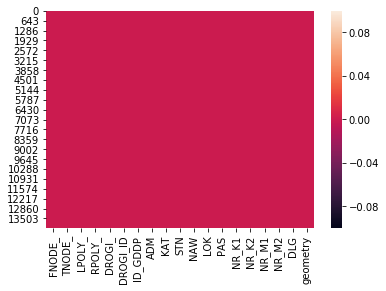

In [67]:
sns.heatmap(dictionary_of_geodataframes['drogi'].isnull())

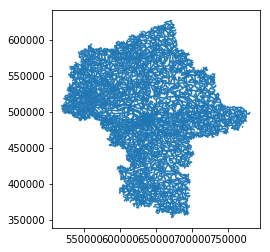

In [68]:
dictionary_of_geodataframes['drogi'].plot()

In [69]:
fig = plt.figure(figsize=[10,10])

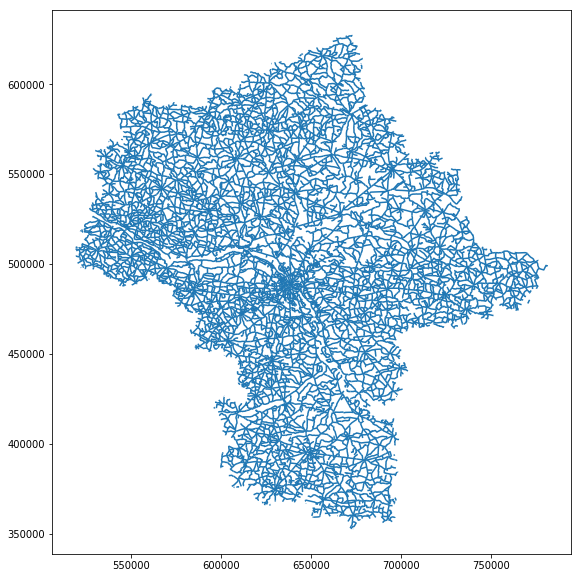

In [71]:
dictionary_of_geodataframes['drogi'].plot(figsize=[10,10])

In [73]:
dictionary_of_geodataframes['drogi'].shape

(14138, 19)

In [74]:
dictionary_of_geodataframes['drogi'].columns

Index(['FNODE_', 'TNODE_', 'LPOLY_', 'RPOLY_', 'DROGI_', 'DROGI_ID', 'ID_GDDP',
       'ADM', 'KAT', 'STN', 'NAW', 'LOK', 'PAS', 'NR_K1', 'NR_K2', 'NR_M1',
       'NR_M2', 'DLG', 'geometry'],
      dtype='object')

In [75]:
dictionary_of_geodataframes['drogi'].head()

,FNODE_,TNODE_,LPOLY_,RPOLY_,DROGI_,DROGI_ID,ID_GDDP,ADM,KAT,STN,NAW,LOK,PAS,NR_K1,NR_K2,NR_M1,NR_M2,DLG,geometry
0,22609,22672,4,4,30137,1278831,-99,4,6,1,2,1,2,-98,-98,-98,-98,1788.96,LINESTRING (673283.3131343754 352765.530850269...
1,22600,22523,4,4,30057,1278733,-99,3,6,1,1,1,2,-98,-98,-98,-98,1633.05,LINESTRING (671549.5792447608 353183.100130657...
2,22523,22383,4,4,29971,1278653,-99,3,6,1,1,1,2,-98,-98,-98,-98,2483.00,LINESTRING (672108.8752452816 354397.405923788...
3,22600,22383,4,4,30060,1278738,-99,3,6,1,1,1,2,-98,-98,-98,-98,7353.83,LINESTRING (671854.4660290447 352942.354146433...
4,22345,22466,3,3,29903,570056,-99,2,5,1,1,1,2,754,-98,-98,-98,3895.02,LINESTRING (690939.6869108193 357339.938022529...


In [87]:
klasy = dictionary_of_geodataframes['drogi']['KAT'].value_counts()

In [89]:
fig = plt.figure(figsize=[10,10])
# /
# plt.hist(klasy)

In [82]:
from sqlalchemy import create_engine

In [83]:
# engine = create_engine('postgresql://postgres:kojack01')

In [100]:
import subprocess

In [157]:
import os, subprocess
main_command = 'ogr2ogr -f "PostgreSQL" -t_srs srs_def EPSG:2180 PG:"host={} port={} dbname={} user={} password={}" "{}" -lco schema={} -lco GEOM_TYPE=geography -lco GEOMETRY_NAME=geom -lco dim=2'
    
#parameters
host = 'localhost'
port = 5432
dbname = 'geodjango'
user = 'postgres'
password = 'kojack01'
cwd = os.getcwd()

def data_upload():
#     full_dir = os.walk(cwd)
    shapefile_list = []
    list_of_names = []

    for source, dirs, files in os.walk('BDO_250'):
        for file_ in files:
            if file_[-3:] == 'shp':
                shapefile_path = os.path.join(cwd, source, file_)
                list_of_names.append(file_[:-4])
                shapefile_list.append(shapefile_path)
                
    for index, shape_path in enumerate(shapefile_list):
        cmd = main_command.format(host, port, dbname, user, password, shapefile_list[index], 'bdo')
        print(cmd)
        subprocess.call(cmd, shell=True)
# data_upload()

In [149]:
# for dir_, _, files in os.walk(cwd):
#     print(_)

In [163]:
dictionary_of_geodataframes['arkusze'].to_crs(epsg=2180).to_file('new_file_2180.shp')

In [169]:
dictionary_of_geodataframes['arkusze']

,AREA,PERIMETER,AAA_,AAA_ID,NAME,geometry
0,7.379719e+09,355177.844,2,3,2153,"POLYGON ((631051.5625 683576.625, 696561.875 6..."
1,7.376538e+09,355101.250,3,2,2053,"POLYGON ((565528.875 682188.5625, 631051.5625 ..."
2,7.374947e+09,355062.969,4,1,1953,"POLYGON ((565528.875 682188.5625, 567089.3125 ..."
3,7.563169e+09,358531.000,5,8,2352,"POLYGON ((768300.875 577993, 835333.6875 58220..."
4,7.556336e+09,358369.000,6,7,2252,"POLYGON ((701245.375 574717.5, 768300.875 5779..."
5,7.551205e+09,358247.344,7,6,2152,"POLYGON ((701245.375 574717.5, 705867.125 4635..."
6,7.547794e+09,358166.375,8,5,2052,"POLYGON ((634173 572378.6875, 637253.1875 4611..."
7,7.546086e+09,358125.844,9,4,1952,"POLYGON ((567089.3125 570975.75, 568629.125 45..."
8,7.725789e+09,361402.969,10,11,2251,"POLYGON ((774465.875 466864.28125, 780546.8125..."
9,7.720309e+09,361274.781,11,10,2151,"POLYGON ((705867.125 463557.96875, 710425.6875..."
